<a href="https://colab.research.google.com/github/NorthrendCoder/python-mastery/blob/main/nba_shots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install 'vanna[chromadb,qianwen]'
!pip install pandas

In [6]:
import pandas as pd
import sqlite3

In [53]:
def import_csv_to_sqlite(csv_path,db_name='nba_shots.db'):
    df = pd.read_csv(csv_path)
    conn = sqlite3.connect(db_name)
    df.to_sql('nba_shots',conn,if_exists='replace',index=False)
    conn.close()
    print(f'Data imported successfully to {db_name}')

In [55]:
import_csv_to_sqlite("NBA_2023_Shots.csv")

Data imported successfully to nba_shots.db


In [22]:
from vanna.qianwen import QianWenAI_Chat
from vanna.chromadb import ChromaDB_VectorStore

In [38]:
class MyVanna(ChromaDB_VectorStore, QianWenAI_Chat):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        QianWenAI_Chat.__init__(self, config=config)

vn = MyVanna(config={'api_key': 'sk-374de61cf27546af9d9cbd25b87e9bd8','model': 'qwen-plus'})
#'base_url':'https://api.chatanywhere.tech/v1',

In [56]:
vn.connect_to_sqlite('nba_shots.db')

In [57]:
documentation = '''
TABLENAME: nba_shots
PLAYER_NAME:PLAYER'S NAME
SEASON_ID: NBA's unique ID variable of that specific season in their API.
SEASON_1 & SEASON_2: Season indicator variables
TEAM_ID: NBA's unique ID variable of that specific team in their API.
PLAYER_ID: NBA's unique ID variable of that specific player in their API.
GAME_DATE: Date of the game (M-D-Y // Month-Date-Year).
GAME_ID: NBA's unique ID variable of that specific game in their API.
EVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).
SHOT_MADE: True/False variable denoting a shot outcome (True // False).
ACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).
SHOT_TYPE: Type of shot (2PT or 3PT).
BASIC_ZONE: Name of the court zone the shot took place in.
Restricted Area, In the Paint (non-RA), Midrange, Left Corner 3, Right Corner 3, Above the Break, Backcourt.
ZONE_NAME: Name of the side of court the shot took place in.
left, left side center, center, right side center, right
ZONE_ABB: Abbreviation of the side of court.
(L), (LC), (C), (RC), (R).
ZONE_RANGE: Distance range of shot by zones.
Less than 8 ft., 8-16 ft. 16-24 ft. 24+ ft.
LOC_X: X coordinate of the shot in the x, y plane of the court (0, 50).
LOC_Y: Y coordinate of the shot in the x, y plane of the court (0, 50).
SHOT_DISTANCE: Distance of the shot with respect to the center of the hoop, in feet.
QUARTER: Quarter of the game.
MINS_LEFT: Minutes remaining in the quarter.
SECS_LEFT: Seconds remaining in minute of the quarter.
'''

In [58]:
vn.train(documentation = f'Please refer to the content to understand the meaning of all the columns in the source of the truth.{documentation}')

Adding documentation....


'259d9ac3-929f-5f2c-8543-1439593864c8-doc'

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the content to understand the meaning of all the columns in the source of the truth.\nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (True // False).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3PT).\nBASIC_ZONE: Name of the court zone 

LLM Response: SELECT COUNT(*) AS total_shots
FROM nba_shots;
Extracted SQL: SELECT COUNT(*) AS total_shots
FROM nba_shots;
SELECT COUNT(*) AS total_shots
FROM nba_shots;
   total_shots
0       217220
Using model qwen-plus for 162.75 tokens (approx)


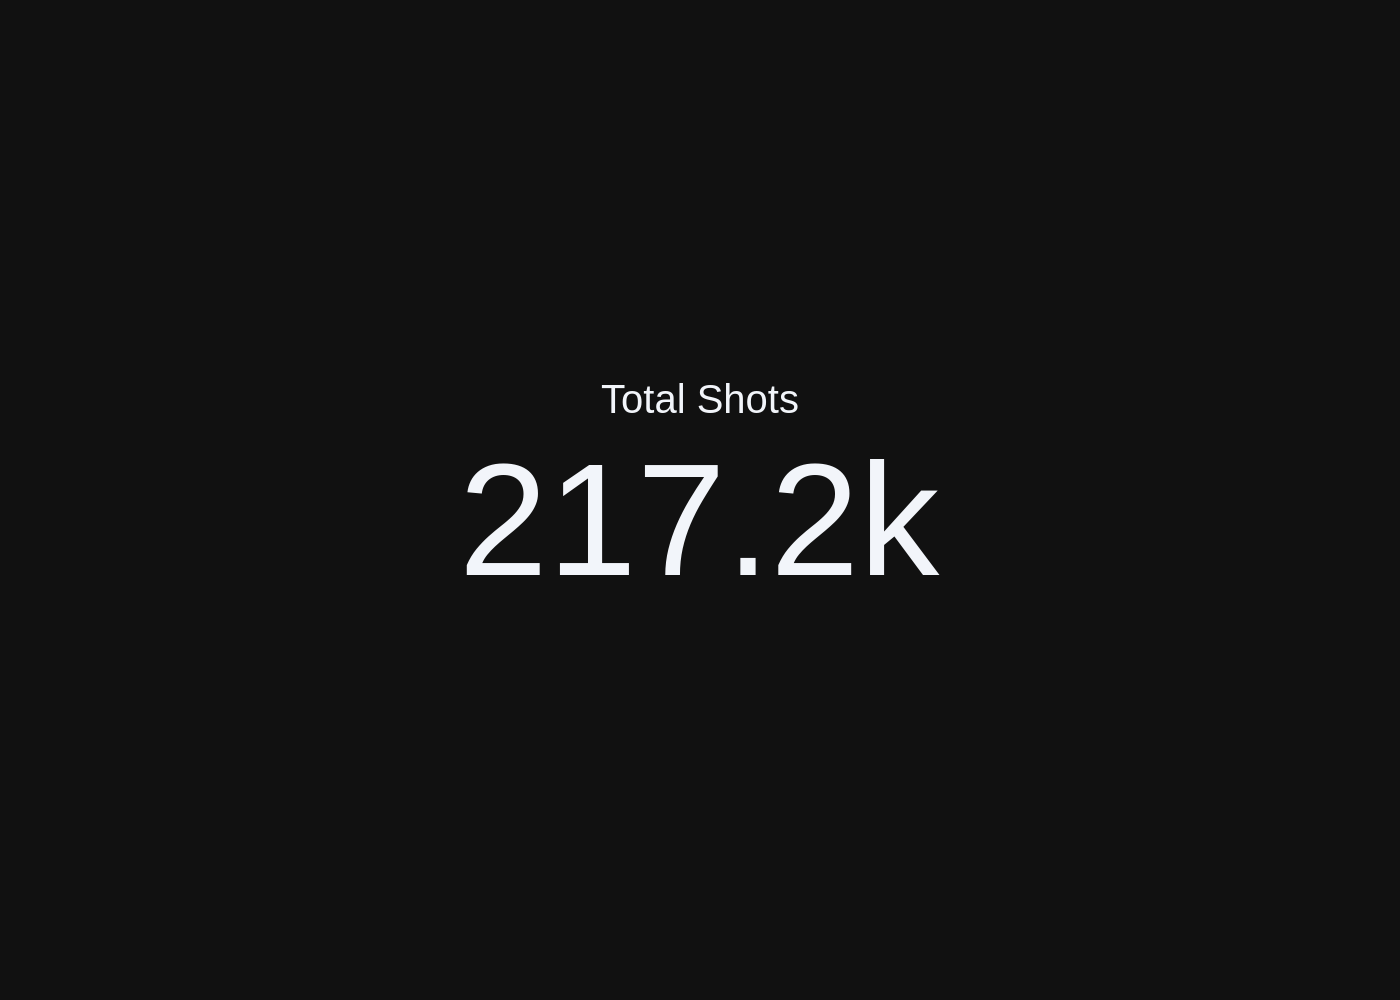

In [59]:
response = vn.ask('How many shots in total?')

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the content to understand the meaning of all the columns in the source of the truth.\nTABLENAME: nba_shots\nPLAYER_NAME:PLAYER'S NAME\nSEASON_ID: NBA's unique ID variable of that specific season in their API.\nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (True // False).\nACTION_TYPE: Descript

Using model qwen-plus for 183.5 tokens (approx)


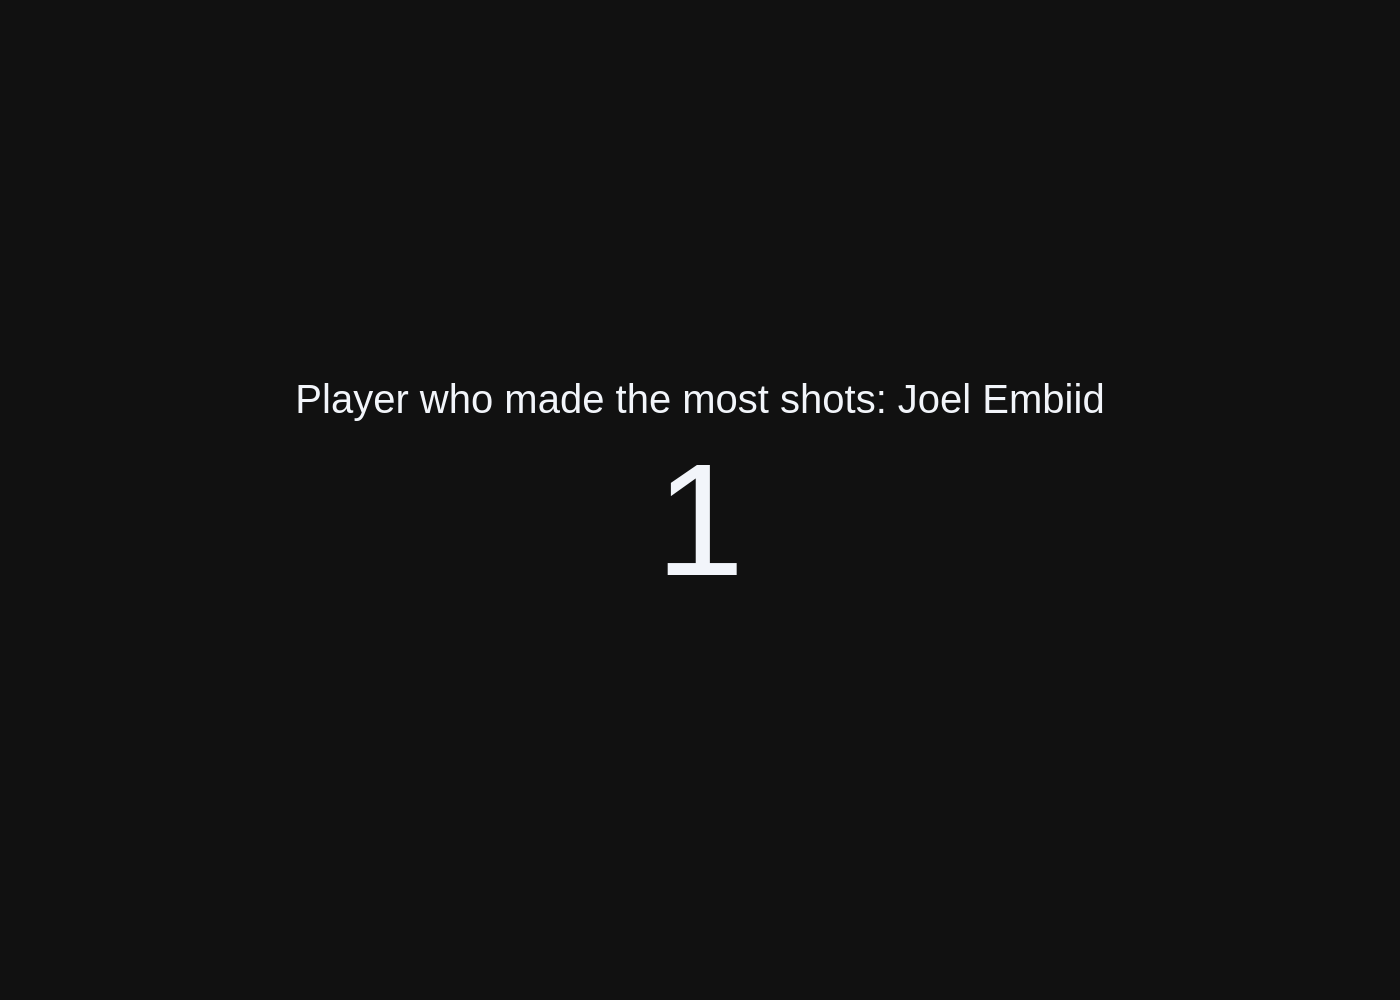

In [60]:
question = 'Who made most shots,give me the player name'
response = vn.ask(question)

In [61]:
sql = vn.generate_sql(question)

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the content to understand the meaning of all the columns in the source of the truth.\nTABLENAME: nba_shots\nPLAYER_NAME:PLAYER'S NAME\nSEASON_ID: NBA's unique ID variable of that specific season in their API.\nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (True // False).\nACTION_TYPE: Descript

In [62]:
sql

'SELECT PLAYER_NAME\nFROM nba_shots\nWHERE SHOT_MADE = True\nGROUP BY PLAYER_NAME\nORDER BY COUNT(*) DESC\nLIMIT 1;'

In [63]:
result = vn.run_sql(sql)

In [64]:
result

,PLAYER_NAME
0,Joel Embiid


In [65]:
code = vn.generate_plotly_code(result)

Using model qwen-plus for 126.25 tokens (approx)


In [66]:
code

'import plotly.graph_objects as go\n\nif len(df) == 1:\n    fig = go.Figure(go.Indicator(\n        mode = "number",\n        value = df[\'PLAYER_NAME\'].iloc[0],\n        title = {"text": "PLAYER NAME"}\n    ))\nelse:\n    fig = go.Figure(data=go.Bar(x=df.index, y=df[\'PLAYER_NAME\']))\n'

In [67]:
figure = vn.get_plotly_figure(code,result)

In [69]:
figure.write_image('plot.png')

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the content to understand the meaning of all the columns in the source of the truth.\nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (True // False).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3PT).\nBASIC_ZONE: Name of the court zone 

Using model qwen-plus for 199.0 tokens (approx)


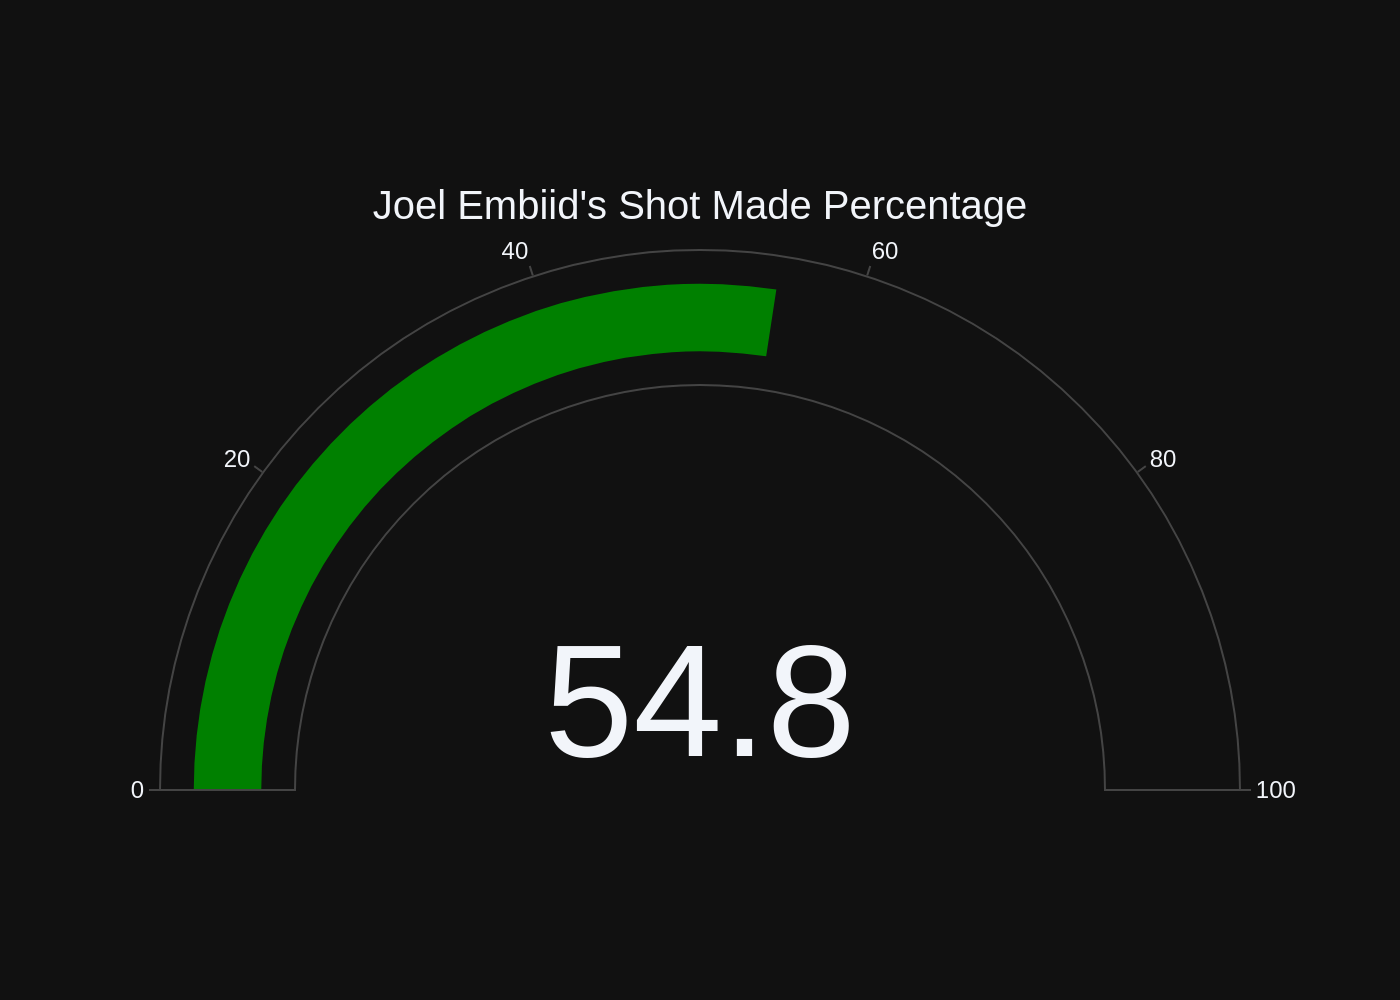

("SELECT CAST(SUM(CASE WHEN SHOT_MADE = True THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*) * 100 AS shot_made_percentage\nFROM nba_shots\nWHERE PLAYER_NAME = 'Joel Embiid';",
    shot_made_percentage
 0             54.819277,
 Figure({
     'data': [{'gauge': {'axis': {'range': [0, 100]}},
               'mode': 'gauge+number',
               'title': {'text': "Joel Embiid's Shot Made Percentage"},
               'type': 'indicator',
               'value': 54.81927710843374}],
     'layout': {'template': '...'}
 }))

In [73]:
vn.ask("show me Joel Embiid's shot made percentage")

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nPlease refer to the content to understand the meaning of all the columns in the source of the truth.\nSEASON_1 & SEASON_2: Season indicator variables\nTEAM_ID: NBA's unique ID variable of that specific team in their API.\nPLAYER_ID: NBA's unique ID variable of that specific player in their API.\nGAME_DATE: Date of the game (M-D-Y // Month-Date-Year).\nGAME_ID: NBA's unique ID variable of that specific game in their API.\nEVENT_TYPE: Character variable denoting a shot outcome (Made Shot // Missed Shot).\nSHOT_MADE: True/False variable denoting a shot outcome (True // False).\nACTION_TYPE: Description of shot type (layup, dunk, jump shot, etc.).\nSHOT_TYPE: Type of shot (2PT or 3PT).\nBASIC_ZONE: Name of the court zone 

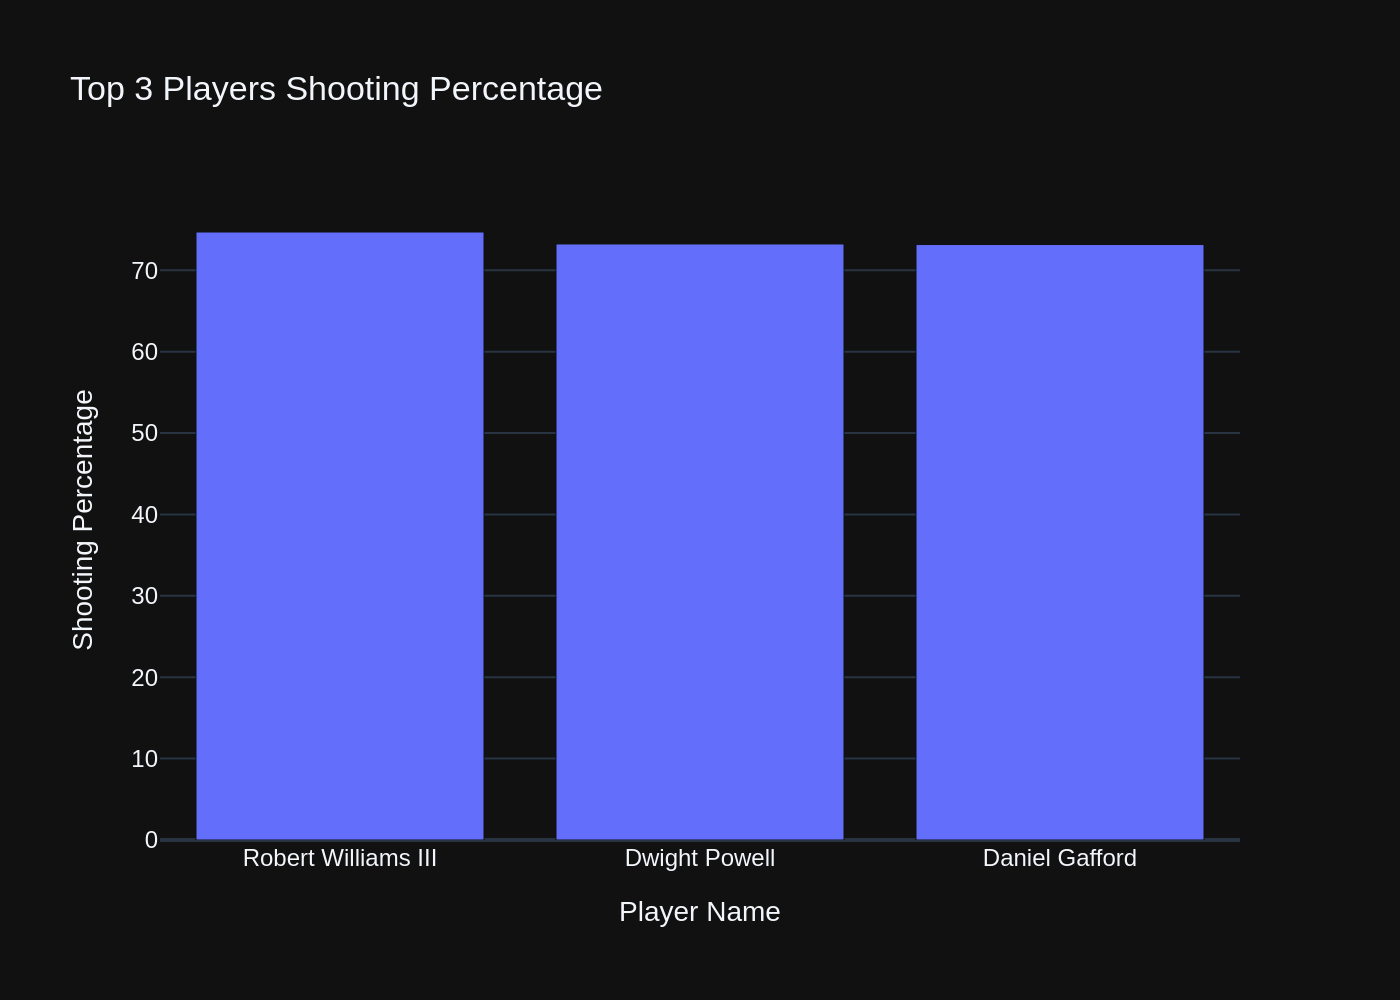

In [76]:
question = "Plot the shooting percentage of the top3 players with the highest shot made percentage,the player had to made more than 100 shots"
response = vn.ask(question)